In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [37]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

X = df.iloc[:, :13]
y = df.iloc[:, 13]

X = X.replace(to_replace='?', value=0)

y = np.where(y > 0, 0, 1)

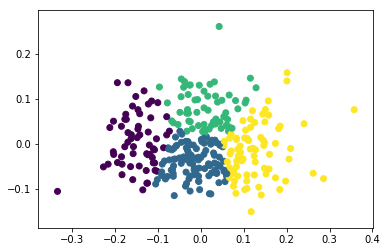

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      40  21
1      37  67
2      42  20
3      20  56


In [70]:
X_norm = normalize(X)

X_pca = PCA(2).fit_transform(X_norm)

y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca)

plt.scatter(X_pca[:,0],X_pca[:,1], c=y_pred)
plt.show()

print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [71]:
# Minibatch KMeans
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=200)
minibatchkmeans.fit(X_pca)

predict_mini = minibatchkmeans.predict(X_pca)

print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3
row_0                
0       0  91  42   0
1       0   7  18  76
2      61   6   2   0


For the case of a binary target variable, two clusters wil work the best.  Any more than 2 and it is hard to decipher which belongs to 1 and which belongs to 0.  